<a href="https://colab.research.google.com/github/imbiotech/skbtML/blob/main/4-4.KNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `4-4.KNN(K-Nearest Neighbor)`

* 가장 가까운 K개의 이웃의 대표 속성값을 통해 데이터를 예측하는 알고리즘

* KNN의 장점
    * 간단한 구조
    * 이해가 쉬움
    * 구현이 쉬움
    * 강력한 결과 (노력 대비 좋은 성능)
    * 데이터 수가 적어도 Model을 생성할 수 있음

* KNN의 특징
    * 가장 많은 자료 수가 존재하는 클래스/속성을 예측값으로 설정
    * 여러 개의 K값으로 테스트를 해본 후 가장 좋은 방법으로 나눔
        * K값에 따라서 분류 결과가 달라지고 정확도와 신뢰도까지 영향을 받음
    * 모든 계산이 이뤄진 후에 분류를 수행하므로 사례 기반 학습 또는 메모리 기반 학습으로 부름
    * 훈련 데이터에 Target이 존재하는 지도 학습 알고리즘
    * 각 속성에 맞춰 레벨을 분류하는 방식으로 예측 진행
    * KNN의 적용 분야
        * 분류에 해당하는 대부분의 업무 분야에 적용 가능
        * 얼굴 인식이나 글자 인식 등 이미지 인식
        * 적절한 상품 추천
        <br/>등

* KNN의 적용법
    1. 예측 대상을 기점으로 K개의 이웃이 포함된 대표 집단을 만듦
    2. 대표 집단 내에서 클래스 또는 속성을 설정하고 집단 내에서 우세한 레벨을 찾음
    3. 예측 대상이 우세한 레벨과 동일한 레벨이라고 가정하여 예측 진행
        1) 단순 KNN은 집단 내의 거리가 무시될 수 있음
        2) 거리를 고려한 weighted KNN을 사용하기도 함
        <br/> "거리의 역수"나 "거리의 역수의 제곱의 역수"를 가중치로 두어 정확도가 높아짐
    

* 용도에 따라 다음과 같은 python 함수를 사용
    * KNeighborsClassifier(): 분류 알고리즘
    * KNeighborsRegressor(): 연속 데이터 예측 알고리즘

---
#### 코드블럭1
**_KNN 예시 코드 1 시작_**

이상형 데이터에 대한 KNN Model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# "ideal_type.csv"에서 데이터 프레임 생성 및 상위 5 개 데이터 확인
ideal_type = pd.read_csv("https://raw.githubusercontent.com/imbiotech/skbtML/main/4-4-1.ideal_type.csv")
ideal_type.head()

In [ ]:
# 데이터와 결과를 분리
ideal_type_data = ideal_type.drop("attraction_label", axis=1)
ideal_type_target = ideal_type["attraction_label"]

# 데이터와 결과를 array로 변환
ideal_type_data_array = np.array(ideal_type_data)
ideal_type_target_array = np.array(ideal_type_target)

ideal_type_data_array, ideal_type_target_array

In [ ]:
# 데이터 정규화를 위해 StandardScaler 함수 불러오고 StandardScaler 생성
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit_transform 함수를 사용하여 데이터를 표준화
ideal_type_data_array = scaler.fit_transform(ideal_type_data_array)
ideal_type_data_array

In [1]:
# KNN 분류 모델 생성 및 훈련
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5) # KNN 분류 모델 생성, 이웃의 수는 5으로 설정
model.fit(ideal_type_data_array, ideal_type_target_array) # 모델 훈련

# 예측 결과 확인
ideal_type_pred = model.predict(ideal_type_data_array)
print(ideal_type_pred) # 모델이 예측한 결과

# confusion_matrix 함수를 사용하여 오차 행렬 출력
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(ideal_type_target_array, model.predict(ideal_type_data_array))) # 오차 행렬(혼돈 행렬) 출력, 혼돈 행렬의 숫자는 데이터가 대각선일수록 좋음
print(classification_report(ideal_type_target_array, ideal_type_pred)) # 정밀도, 재현율, F1 점수 출력

NameError: name 'ideal_type_data_array' is not defined

**_KNN 예시 코드 1 종료_**

---

---
#### 코드블럭2
**_KNN 예시 코드 2 시작_**

나이에 따른 수입과 구매 데이터를 활용한 KNN Model

In [50]:
# 1. 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [56]:
# 2. 필요한 데이터 불러오기

# "4-4-2.purchase.csv"에서 데이터 프레임 생성 및 상위 5 개 데이터 확인
purchase = pd.read_csv("https://raw.githubusercontent.com/imbiotech/skbtML/main/4-4-2.purchase.csv")
purchase.head()

,age,salary,purchase
0,26,160,구매
1,35,210,비구매
2,26,220,비구매
3,29,260,구매
4,22,110,비구매


In [35]:
# 3. 데이터 전처리

# "purchase" 컬럼을 범주형 데이터에서 수치형 데이터로 변환
purchase["purchase"] = purchase["purchase"].replace("구매", 1)
purchase["purchase"] = purchase["purchase"].replace("비구매", 0)

# purchase 데이터 프레임을 array로 변환
purchase_array = np.array(purchase)
purchase_array[:5]

array([[ 26, 160,   1],
       [ 35, 210,   0],
       [ 26, 220,   0],
       [ 29, 260,   1],
       [ 22, 110,   0]], dtype=int64)

In [64]:
# 데이터 fit_transform 함수를 사용하여 데이터를 표준화
scaler = StandardScaler()
purchase_array = scaler.fit_transform(purchase_array)
print(f"purchase_array:\n {purchase_array[:5]}\n")

# 표준화하면서 데이터 프레임이 array로 변환되었으므로 다시 데이터 프레임으로 변환
purchase = pd.DataFrame(purchase_array, columns=["age", "income", "purchase"])
print("purchase")
purchase.head()

purchase_array:
 [[-0.67743894 -0.81302375  1.22474487]
 [ 1.0161584  -0.25994637 -0.81649658]
 [-0.67743894 -0.14933089 -0.81649658]
 [-0.11290649  0.29313101  1.22474487]
 [-1.43014887 -1.36610113 -0.81649658]]

purchase


,age,income,purchase
0,-0.677439,-0.813024,1.224745
1,1.016158,-0.259946,-0.816497
2,-0.677439,-0.149331,-0.816497
3,-0.112906,0.293131,1.224745
4,-1.430149,-1.366101,-0.816497


In [70]:
# 4. KNN 분류 모델 생성 및 훈련

# 데이터와 결과를 분리, 데이터 = income, purchase, 결과 = age 2개 컬럼
# 데이터에 두 개의 컬럼을 사용하기 위해 결과를 age로 설정
purchase_data = purchase[["income", "purchase"]]
purchase_target = purchase["age"]

# 데이터와 결과를 array로 변환
purchase_data_array = np.array(purchase_data)
purchase_target_array = np.array(purchase_target)

# KNN 분류 모델 생성 및 훈련
model = KNeighborsRegressor() # KNN 분류 모델 생성, 이웃의 수는 Default 값인 5로 설정
model.fit(purchase_data_array, purchase_target_array) # 모델 훈련

KNeighborsRegressor()

In [71]:
# 5. 예측 결과 확인 및 평가

# 예측 결과 확인
purchase_pred = model.predict(purchase_data_array)
print(f"purchase_pred:\n {purchase_pred[:5]}\n") # 모델이 예측한 결과

# MSE, RMSE, R2 점수 출력
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(purchase_target_array, purchase_pred)
rmse = np.sqrt(mse)
r2 = r2_score(purchase_target_array, purchase_pred)
print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}\n")

purchase_pred:
 [ 1.50541986e-01 -1.50541986e-01 -3.33066907e-17  5.64532447e-01
 -7.52709929e-01]

MSE: 0.4115, RMSE: 0.6415, R2: 0.5885



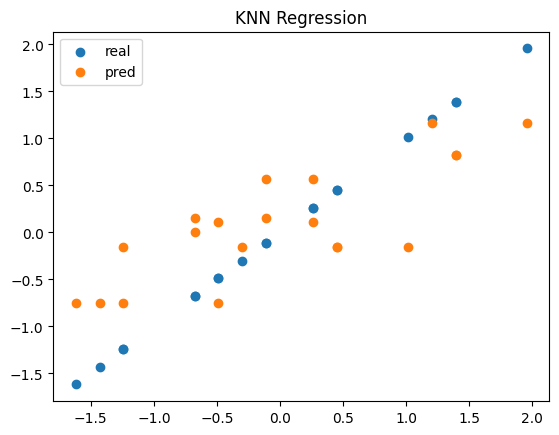

In [78]:
# 시각화
plt.scatter(purchase_target_array, purchase_target_array, label="real") # 실제값을 그래프에 표시
plt.scatter(purchase_target_array, purchase_pred, label="pred") # 예측값을 그래프에 표시
plt.title("KNN Regression") # 그래프 제목 설정
plt.legend() # 범례 표시
plt.show() # 그래프 출력

**_KNN 예시 코드 2 종료_**

---

---
#### 코드블럭3
**_KNN 예시 코드 3 시작_**

Iris data를 활용한 KNN Model

In [105]:
# 1. 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [85]:
# 2. 필요한 데이터 불러오기
iris = datasets.load_iris() # 붓꽃 데이터 불러오기
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names) # 데이터 프레임 생성
iris_df["target"] = iris.target # target 컬럼 추가
iris_df.head() # 데이터 프레임 상위 5개 데이터 확인

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [102]:
# 3. 데이터 전처리

# 데이터와 결과를 분리하고 array로 변환
iris_data = iris_df.drop("target", axis=1)
iris_target = iris_df["target"]
iris_data_array = np.array(iris_data)
iris_target_array = np.array(iris_target)

print(f"데이터 중 상위 5개: \n {iris_data_array[:5]} \n 결과 중 상위 5개: \n {iris_target_array[:5]} \n")

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data_array, iris_target_array, test_size=0.2, random_state=1)

# 훈련 데이터에 대해서 fit 후 훈련 데이터 및 테스트 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"표준화된 훈련 데이터 중 상위 5개: \n {X_train[:5]} \n 표준화된 테스트 데이터 중 상위 5개: \n {X_test[:5]} \n")

데이터 중 상위 5개: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] 
 결과 중 상위 5개: 
 [0 0 0 0 0] 

표준화된 훈련 데이터 중 상위 5개: 
 [[ 0.31553662 -0.04578885  0.44767531  0.23380268]
 [ 2.2449325  -0.04578885  1.29769171  1.39742892]
 [-0.2873996  -1.24028061  0.05100098 -0.15407273]
 [ 0.67729835 -0.52358555  1.01435291  1.13884531]
 [-0.04622511 -0.52358555  0.73101411  1.52672073]] 
 표준화된 테스트 데이터 중 상위 5개: 
 [[-0.04622511  2.34319467 -1.47902854 -1.31769898]
 [-0.89033581 -1.24028061 -0.45900886 -0.15407273]
 [ 0.91847283 -0.04578885  0.33433978  0.23380268]
 [-0.52857408  2.10429632 -1.42236078 -1.05911537]
 [ 2.48610699  1.86539796  1.46769499  1.00955351]] 



In [100]:
# 4. KNN 분류 모델 생성 및 훈련

# KNN 분류 모델 생성 및 훈련
model = KNeighborsClassifier(n_neighbors=5) # KNN 분류 모델 생성, 이웃의 수는 5로 설정
model.fit(X_train, y_train) # 모델 훈련

KNeighborsClassifier()

In [107]:
# 5. 예측 결과 확인 및 평가

# 예측 결과 확인
y_pred = model.predict(X_test)
print(f"테스트 데이터를 통한 예측 결과 중 상위 5개:\n {y_pred[:5]}\n") # 모델이 예측한 결과

# confusion_matrix 함수를 사용하여 오차 행렬 출력
print(confusion_matrix(y_test, y_pred)) # 오차 행렬(혼돈 행렬) 출력, 혼돈 행렬의 숫자는 데이터가 대각선일수록 좋음
print(classification_report(y_test, y_pred)) # 정밀도, 재현율, F1 점수 출력

테스트 데이터를 통한 예측 결과 중 상위 5개:
 [0 1 1 0 2]

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



**_KNN 예시 코드 3 종료_**

---